In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import tensorflow as tf
import seaborn as sns
from mpl_toolkits.basemap import Basemap
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
import time


In [8]:
#Extract data from CSV
df1=pd.read_csv(r'C:\Users\Sarvagna\Desktop\Sem 2\predictive analytics\EarthquakePrediction-master\database.csv')

In [4]:
df1.tail(5)

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed
23411,12/30/2016,20:08:28,37.3973,141.4103,Earthquake,11.94,2.2,NaN,5.5,MB,...,428.0,97.00,0.681,4.5,0.9100,US10007NTD,US,US,US,Reviewed


In [5]:
df1["Date"] = pd.to_datetime(df1["Date"])

In [9]:
col1 = df1[['Date','Latitude','Longitude','Depth']]
col2 = df1['Magnitude']
#Convert to Numpy array
InputX1 = col1.as_matrix()
InputY1 = col2.as_matrix()
print(InputX1)
print(InputY1)

[['01/02/1965' 19.246 145.616 131.6]
 ['01/04/1965' 1.8630000000000002 127.352 80.0]
 ['01/05/1965' -20.579 -173.972 20.0]
 ..., 
 ['12/28/2016' 36.9179 140.4262 10.0]
 ['12/29/2016' -9.0283 118.6639 79.0]
 ['12/30/2016' 37.3973 141.4103 11.94]]
[ 6.   5.8  6.2 ...,  5.9  6.3  5.5]


In [6]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

In [10]:
#feature standardization
col3 = df1[['Date','Latitude','Longitude','Depth','Magnitude']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E6467C6780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002E6451F83C8>]], dtype=object)

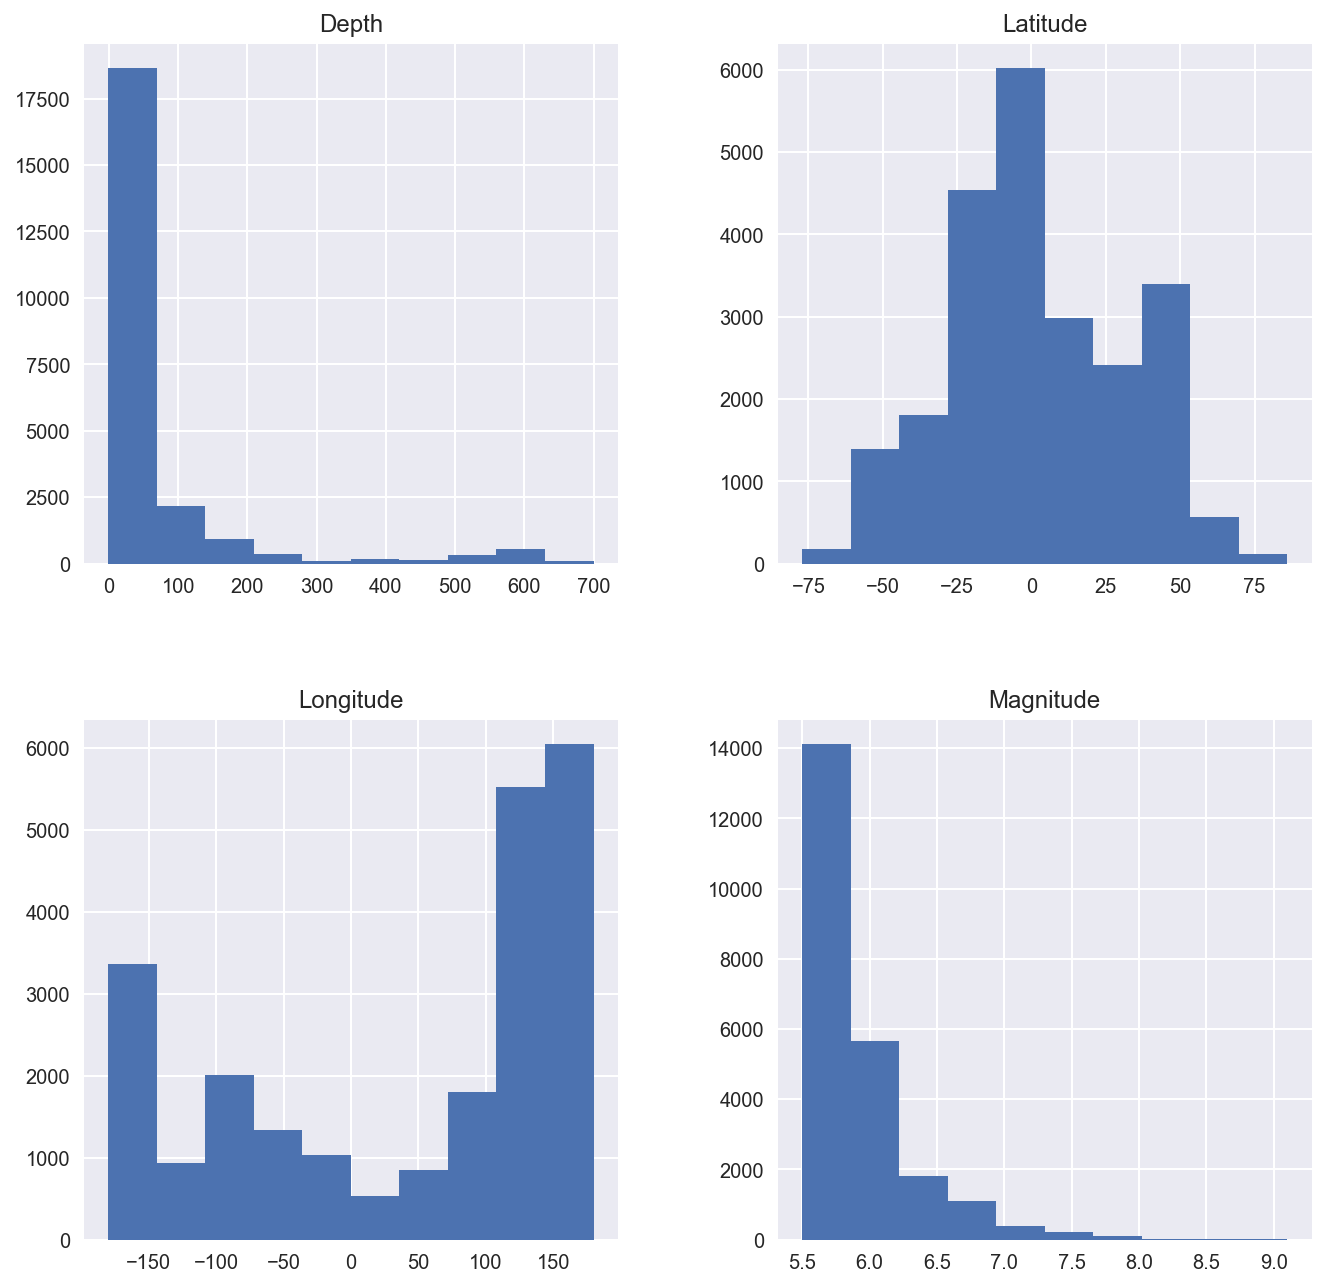

In [11]:
 col3[col3.dtypes[(col3.dtypes=="float64")|(col3.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [29]:
longitudes = df1["Longitude"].tolist()
latitudes = df1["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

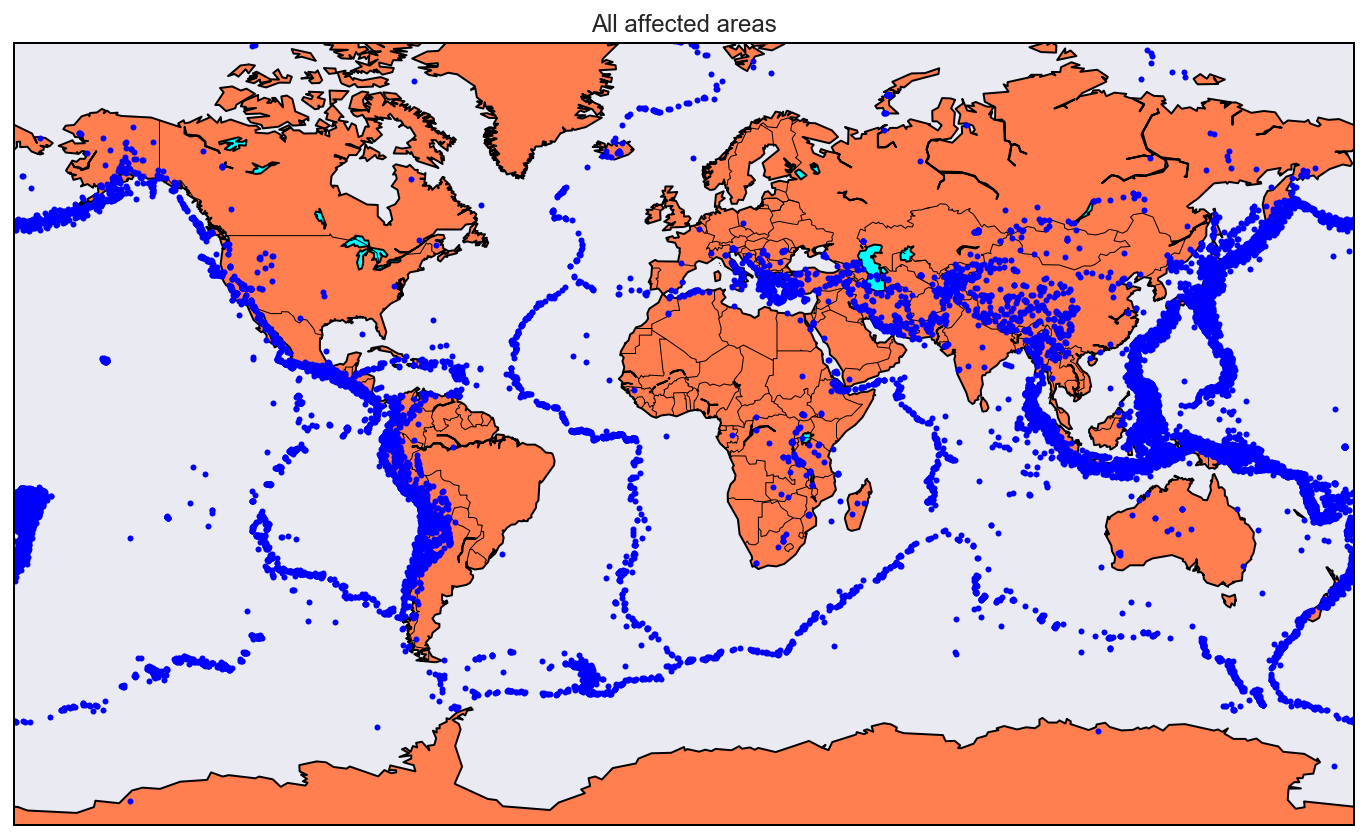

In [30]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 3, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

In [31]:
minimum = df1["Magnitude"].min()
maximum = df1["Magnitude"].max()
average = df1["Magnitude"].mean()

print("Minimum:", minimum)
print("Maximum:",maximum)
print("Mean",average)

Minimum: 5.5
Maximum: 9.1
Mean 5.882530753460003


Magnitude   Number of Occurence
5-6         16058.0
6-7         6616.0
7-8         698.0
8-9         38.0
9-10         2.0


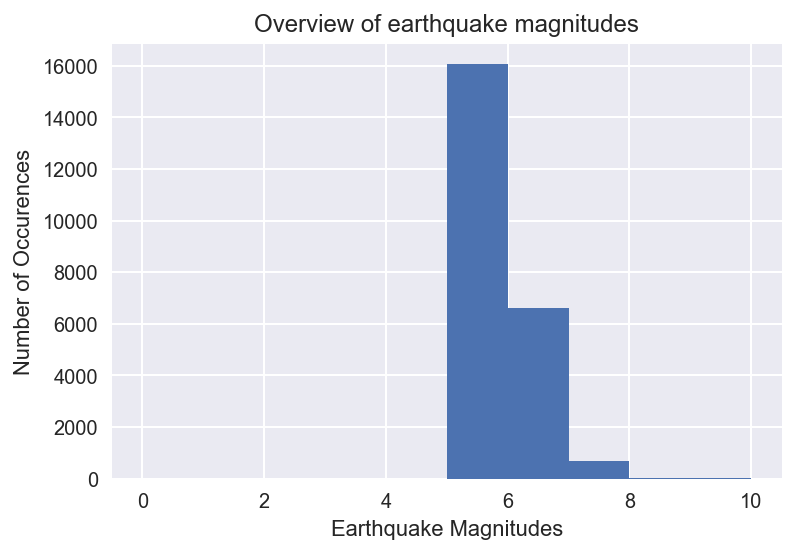

In [32]:
(n,bins, patches) = plt.hist(df1["Magnitude"], range=(0,10), bins=10)
plt.xlabel("Earthquake Magnitudes")
plt.ylabel("Number of Occurences")
plt.title("Overview of earthquake magnitudes")

print("Magnitude" +"   "+ "Number of Occurence")
for i in range(5, len(n)):
    print(str(i)+ "-"+str(i+1)+"         " +str(n[i]))

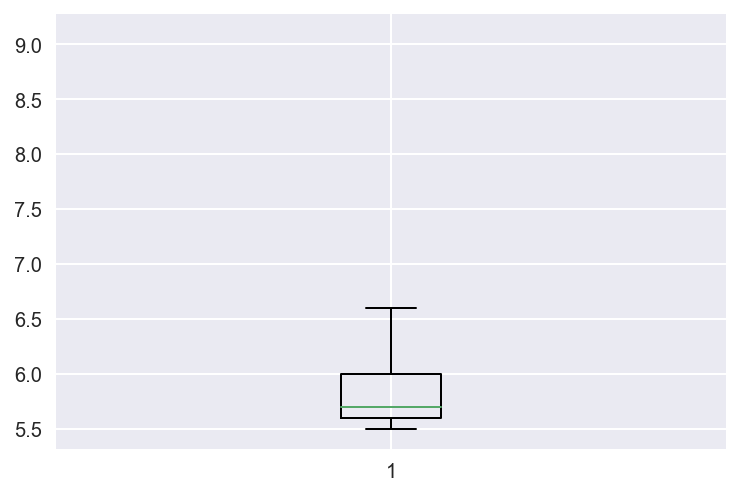

In [33]:
plt.boxplot(df1["Magnitude"])
plt.show()

In [34]:
highly_affected = df1[df1["Magnitude"]>=8]

In [35]:
print(highly_affected.shape)

(40, 21)


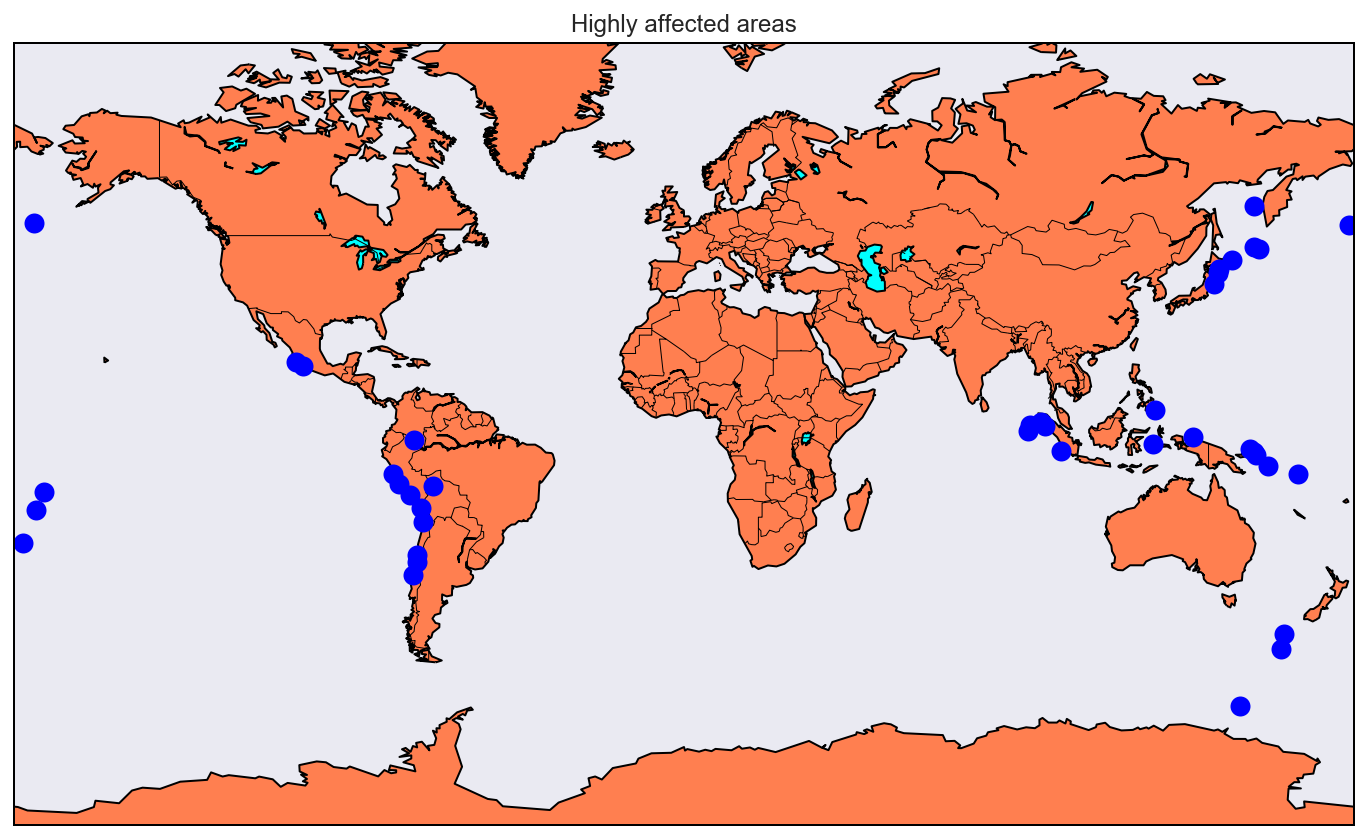

In [36]:
longitudes = highly_affected["Longitude"].tolist()
latitudes = highly_affected["Latitude"].tolist()
n = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
x,y = n(longitudes,latitudes)
fig3 = plt.figure(3,figsize=(12,10))
plt.title("Highly affected areas")
n.plot(x, y, "o", markersize = 10, color = 'blue')
n.drawcoastlines()
n.fillcontinents(color='coral',lake_color='aqua')
n.drawmapboundary()
n.drawcountries()
plt.show()

In [37]:
#earthquake occurances per month
df1["Month"] = df1['Date'].dt.month

In [38]:
#month_occurrence = earth.pivot_table(index = "Month", values = ["Magnitude"] , aggfunc = )

month_occurrence = df1.groupby("Month").groups
print(len(month_occurrence[1]))

month = [i for i in range(1,13)]
occurrence = []

for i in range(len(month)):
    val = month_occurrence[month[i]]
    occurrence.append(len(val))

print(occurrence)
print(sum(occurrence))

1891
[1891, 1829, 2114, 1971, 1964, 1824, 1880, 2014, 1985, 1952, 1987, 2001]
23412


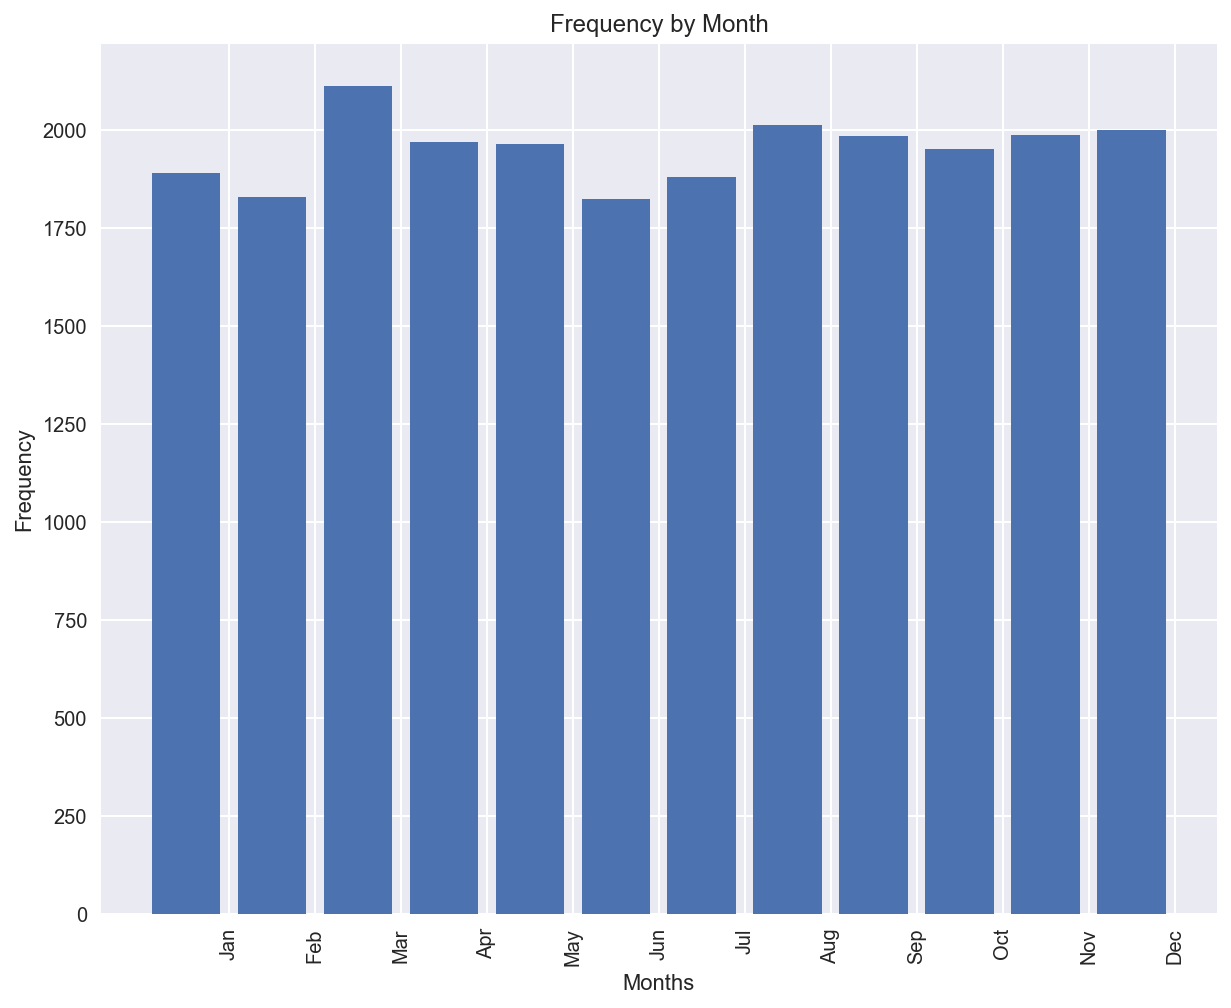

In [39]:
fig, ax = plt.subplots(figsize = (10,8))
bar_positions = np.arange(12) + 0.5

months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
num_cols = months
bar_heights = occurrence

ax.bar(bar_positions, bar_heights)
tick_positions = np.arange(1,13)
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation = 90)
plt.title("Frequency by Month")
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.show()


In [40]:
df1["Year"] = df1['Date'].dt.year

Maximum 713
Minimum 234


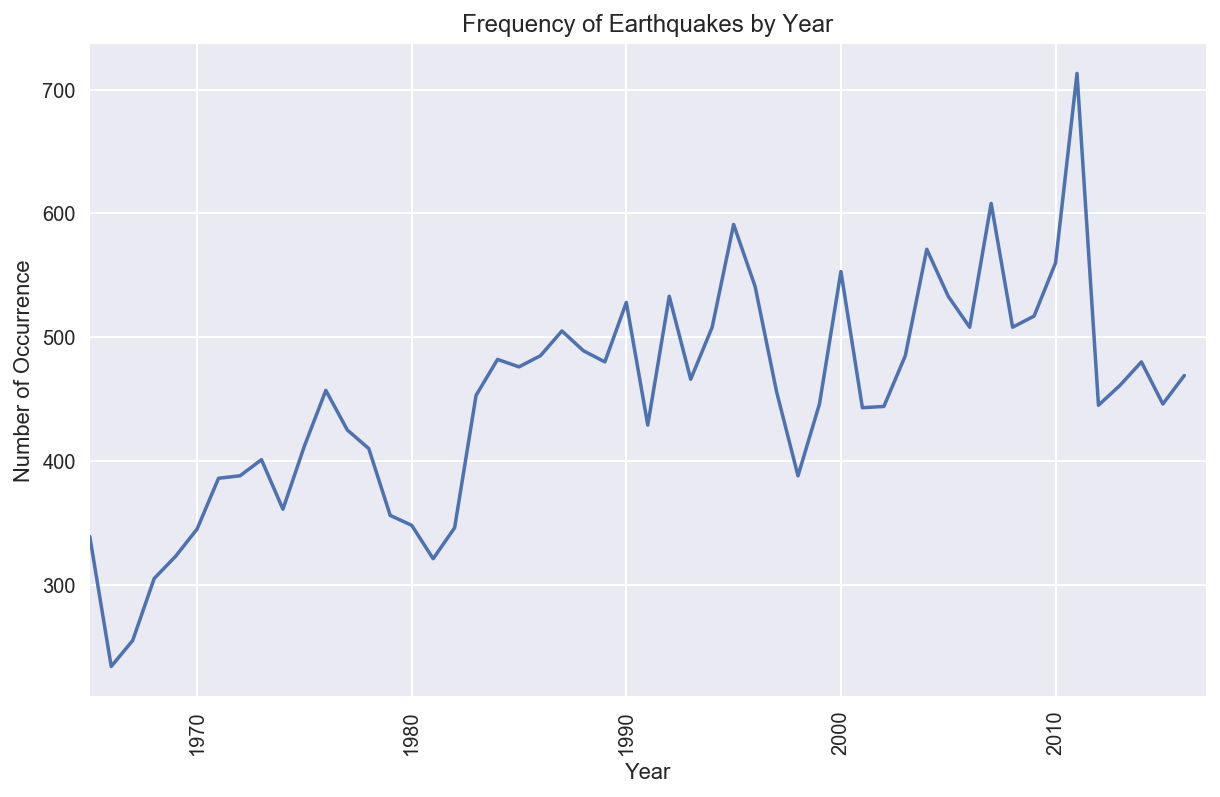

In [41]:
year_occurrence = df1.groupby("Year").groups


year = [i for i in range(1965,2017)]
occurrence = []

for i in range(len(year)):
    val = year_occurrence[year[i]]
    occurrence.append(len(val))

maximum = max(occurrence)
minimum = min(occurrence)
print("Maximum",maximum)
print("Minimum",minimum)

#print("Year :" + "     " +"Occurrence")

#for k,v in year_occurrence.items():
    #print(str(k) +"      "+ str(len(v)))

fig = plt.figure(figsize=(10,6))
plt.plot(year,occurrence)
plt.xticks(rotation = 90)
plt.xlabel("Year")
plt.ylabel("Number of Occurrence")
plt.title("Frequency of Earthquakes by Year")
plt.xlim(1965,2017)
plt.show()

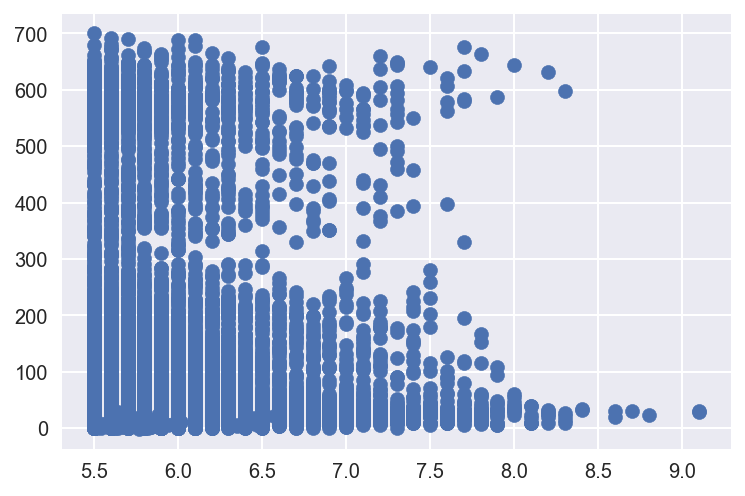

In [42]:
plt.scatter(df1["Magnitude"],df1["Depth"])

In [43]:
np.corrcoef(df1["Magnitude"], df1["Depth"])

array([[ 1.        ,  0.02345731],
       [ 0.02345731,  1.        ]])